# Régressions linéaire et polynôme avec python
# Alexis Araujo

## Exercice 4

#### Réalisation d'un dataset

In [1]:
# Import des librairies
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

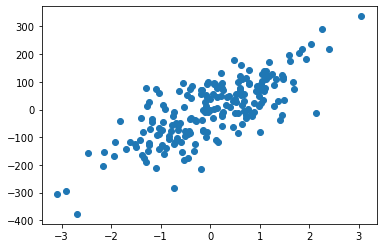

In [2]:
# Création du dataset
x, y = make_regression(n_samples=200, n_features=2, noise=10)
plt.scatter(x[:, 0], y)    #affichage en plan 2d

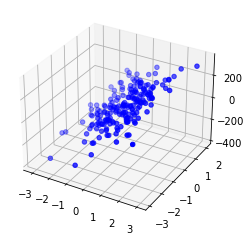

In [3]:
#affichage en plan 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, c='b', marker='o')
plt.show()

In [4]:
# Assurer que les dimensions de nos données sont cohérentes
print (x.shape)
print (y.shape)
y=y.reshape(y.shape[0], 1)
print(y.shape)

(200, 2)
(200,)
(200, 1)


In [5]:
# Création de la matrice dataset (2D colonne x1, colonne x2 et une colonne de 1)
X = np.column_stack((x, np.ones(x.shape[0])))

# Initialisation des paramètres a et b de la régression linéaire (Tableau 1D de 2 éléments a et b)
theta = np.random.randn(3, 1)
theta, X

(array([[-0.35674396],
        [-2.23033978],
        [-0.83190582]]),
 array([[ 0.55296585, -0.42868973,  1.        ],
        [ 0.46323764, -0.19643403,  1.        ],
        [ 1.06873215, -0.54052641,  1.        ],
        [-0.08076712,  0.1118871 ,  1.        ],
        [ 2.0270209 ,  1.17311458,  1.        ],
        [-0.63988139, -0.29041333,  1.        ],
        [ 0.22451962,  0.30245612,  1.        ],
        [-0.9394023 , -0.98090793,  1.        ],
        [-2.90914816, -0.85522148,  1.        ],
        [-0.96322693, -0.79496723,  1.        ],
        [ 0.55230325,  0.80656781,  1.        ],
        [ 0.06751247,  1.216627  ,  1.        ],
        [-0.78032874, -0.03021483,  1.        ],
        [-0.09090589,  0.02547147,  1.        ],
        [-1.18365157,  0.51689854,  1.        ],
        [-0.57291651, -1.09088362,  1.        ],
        [-0.0642789 ,  0.74906927,  1.        ],
        [ 1.46499882,  0.17884482,  1.        ],
        [-1.40351253,  1.12544487,  1.        ]

In [6]:
# Définition du modèle régression linéaire
def model(X, theta):
    return X.dot(theta)

# tester le modèle
model(X,theta)

array([[-0.07304928],
       [-0.55904841],
       [-0.00761201],
       [-1.05263888],
       [-4.17147739],
       [ 0.0440884 ],
       [-1.58658175],
       [ 1.69097826],
       [ 2.1133497 ],
       [ 1.2847666 ],
       [-2.82785693],
       [-3.56948207],
       [-0.48613891],
       [-0.85628572],
       [-1.56250464],
       [ 1.80551982],
       [-2.47965371],
       [-1.75342002],
       [-2.84133567],
       [ 1.89523862],
       [-2.42591736],
       [ 1.38082291],
       [-0.49409373],
       [-2.48682236],
       [-2.18464607],
       [ 1.33827039],
       [-3.04906704],
       [ 1.27910965],
       [-2.49618208],
       [-3.2779061 ],
       [-0.31900272],
       [ 1.86813443],
       [-2.48966087],
       [-0.97218132],
       [ 1.29330802],
       [-3.89226879],
       [-1.90672931],
       [ 1.81888099],
       [-0.57077333],
       [ 5.37396405],
       [-4.77289659],
       [-4.02533872],
       [-3.32629806],
       [-4.59094603],
       [ 0.83434321],
       [-4

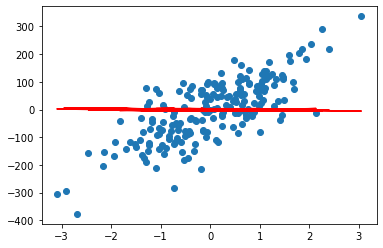

In [7]:
# Affichage de l'application du modèle sur le dataset en 2d
plt.scatter(x[:, 0], y)
plt.plot(x, model(X, theta), c='r')

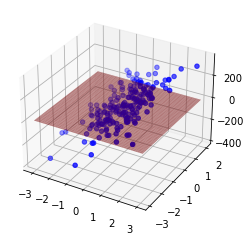

In [8]:
# Affichage de l'application du modèle sur le dataset en 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Affichage des points de données
ax.scatter(x[:, 0], x[:, 1], y, c='blue', marker='o', label='Données')

# Création d'une grille pour les prédictions
x1_pred = np.linspace(min(x[:, 0]), max(x[:, 0]), 100)
x2_pred = np.linspace(min(x[:, 1]), max(x[:, 1]), 100)
x1_pred, x2_pred = np.meshgrid(x1_pred, x2_pred)

# Préparation des données pour les prédictions
X_pred = np.column_stack((x1_pred.ravel(), x2_pred.ravel()))
X_pred = np.column_stack((X_pred, np.ones(X_pred.shape[0])))

# Calcul des prédictions en utilisant les paramètres optimaux du modèle
y_pred = model(X_pred, theta).reshape(x1_pred.shape)

# Affichage des prédictions en 3D
ax.plot_surface(x1_pred, x2_pred, y_pred, color='red', alpha=0.5, label='Prédictions')

#### Fonction de coût
Pour l'évaluation des performances

In [9]:
def cout(X, y, theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

#### Algorithme de descente de gradient


In [10]:
# Calcul de dérivé (gradient)
def grad(X, y, theta):
    m = len(y)
    return (1 / m) * X.T.dot(model(X, theta) - y)

# Algorithme itératif de descente de gradient
def DG(X,y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,y, theta)
        return theta

# Le test de DG avec notre modèle sur dataset
thetaF=DG(X,y, theta, learning_rate =0.001, n_iterations=1000)
thetaF

array([[-0.26791612],
       [-2.15612245],
       [-0.83296173]])

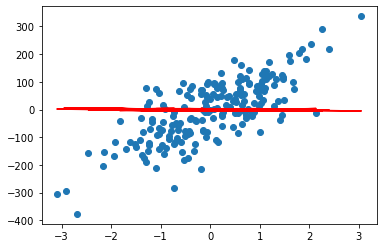

In [11]:
# Affichage de la prédiction
prediction=model(X, thetaF)
plt.scatter(x[:, 0], y)
plt.plot(x, prediction, c='r')

In [12]:
# Evaluation des performances
def DG(X, y, theta, learning_rate, n_iterations):
    histCout = np.zeros(n_iterations)
    for i in range(0 , n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        histCout[i] = cout(X, y, theta)
    return theta, histCout

thetaF, histCout=DG(X,y, theta, learning_rate =0.01, n_iterations=1000)
thetaF, histCout

(array([[76.064231  ],
        [75.27040733],
        [-0.26192272]]),
 array([6183.23998905, 6052.8207999 , 5925.19607517, 5800.30551893,
        5678.09014393, 5558.49224303, 5441.4553613 , 5326.92426871,
        5214.84493342, 5105.16449565, 4997.83124215, 4892.79458117,
        4790.00501807, 4689.41413134, 4590.97454928, 4494.63992709,
        4400.36492449, 4308.10518386, 4217.8173088 , 4129.45884323,
        4042.98825089, 3958.3648953 , 3875.54902019, 3794.50173031,
        3715.18497269, 3637.56151833, 3561.59494422, 3487.24961584,
        3414.49066996, 3343.28399789, 3273.59622904, 3205.39471488,
        3138.64751321, 3073.32337282, 3009.39171843, 2946.82263601,
        2885.58685841, 2825.65575128, 2767.0012993 , 2709.59609275,
        2653.41331432, 2598.42672628, 2544.6106578 , 2491.93999273,
        2440.39015746, 2389.93710921, 2340.55732443, 2292.22778758,
        2244.92598005, 2198.62986939, 2153.31789876, 2108.9689766 ,
        2065.5624665 , 2023.07817737, 1981.49

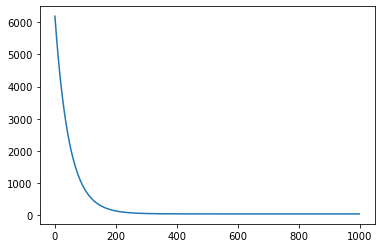

In [13]:
# Dessin de la courbe
plt.plot(range(1000),histCout)

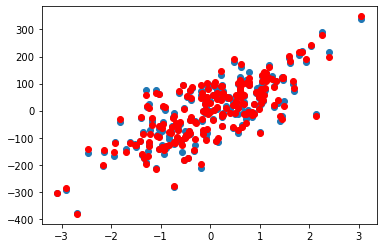

In [14]:
# Affichage de la prédiction en 2d
prediction=model(X, thetaF)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c='r')

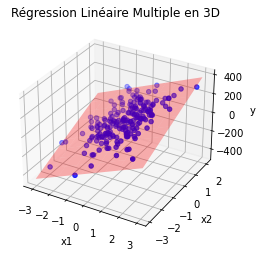

In [15]:
# Affichage de la prédiction en 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], y, c='b', label='Données')

#Voir sous forme de point
#ax.scatter(x[:, 0], x[:, 1], y, c='r')

x1, x2 = np.meshgrid(np.linspace(min(x[:, 0]), max(x[:, 0]), 10), np.linspace(min(x[:, 1]), max(x[:, 1]), 10))
y_pred = model(np.c_[x1.ravel(), x2.ravel(), np.ones(x1.size)], thetaF).reshape(x1.shape)

ax.plot_surface(x1, x2, y_pred, color='r', alpha=0.3, label='Régression')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Régression Linéaire Multiple en 3D')

plt.show()

In [16]:
# Coefficient de détermination (un coeff à 1, le modèle est meilleure)
def coefDet(y, prediction):
    u = ((y - prediction) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v
coefDet(y, prediction)

0.992410338289704

## Exercice 5

In [17]:
# Création du dataset
data = np.genfromtxt('winequality-white.csv', delimiter=';', skip_header=1)

# Vérifier les dimensions du tableau de données
print(data.shape)

# Séparer les caractéristiques (X) et les étiquettes (y)
x= data[:, :-1] # Toutes les colonnes sauf la dernière
y = data[:, -1] # Dernière colonne (quality)

#avec panda
#x= data.drop("quality", axis=1) # Toutes les colonnes sauf la dernière
#y= data["quality"] # Dernière colonne (quality)

x, y

(4898, 12)


(array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
        [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
        [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
        [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
        [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]]),
 array([6., 6., 6., ..., 6., 7., 6.]))

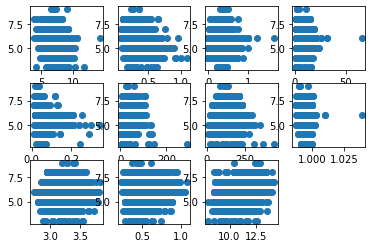

In [18]:
# Affichage pour une caractéristique
#plt.scatter(x[:, 0], y)

#Affichage en 2d pour toutes les caractéristiques
# Obtenir le nombre de caractéristiques
num_features = x.shape[1]

# Créer des scatter plots pour chaque caractéristique
for feature_index in range(num_features):
    plt.subplot(3, 4, feature_index + 1)  # Crée une grille de sous-graphiques
    plt.scatter(x[:, feature_index], y)

No handles with labels found to put in legend.


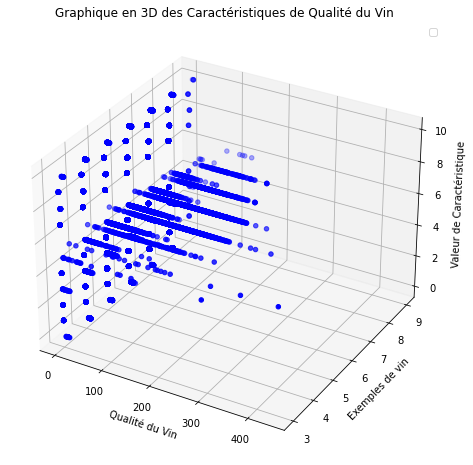

In [19]:
# Affichage de la figure 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser chaque caractéristique comme une dimension
for feature_index in range(x.shape[1]):
    #ax.scatter(x[:, feature_index], y, zs=feature_index, c='b', marker='o', label=f"Caractéristique {feature_index + 1}")
    ax.scatter(x[:, feature_index], y, zs=feature_index, c='b', marker='o')

ax.set_xlabel("Qualité du Vin")
ax.set_ylabel("Exemples de vin")
ax.set_zlabel("Valeur de Caractéristique")

plt.title("Graphique en 3D des Caractéristiques de Qualité du Vin")
plt.legend()
plt.show()

In [20]:
# Assurer que les dimensions de nos données sont cohérentes
print (x.shape)
print (y.shape)
y=y.reshape(y.shape[0], 1)
print(y.shape)

(4898, 11)
(4898,)
(4898, 1)


In [21]:
# Création de la matrice dataset (2D colonne x fois et de une colonne de 1)
X = np.column_stack((x, np.ones(x.shape[0])))

# Initialisation des paramètres pour toutes les caractéristiques (12 caractéristiques + terme)
theta = np.random.randn(12, 1)
theta, X

(array([[-2.29243236],
        [-0.35300228],
        [ 1.36683703],
        [ 1.24471411],
        [ 0.09514696],
        [ 1.10871636],
        [-0.45214623],
        [-1.25830693],
        [ 0.84631321],
        [ 0.72385824],
        [ 0.49315018],
        [-0.76689812]]),
 array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  1.  ],
        [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  1.  ],
        [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  1.  ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  1.  ],
        [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  1.  ],
        [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  1.  ]]))

In [22]:
# Définition du modèle régression linéaire
def model(X, theta):
    return X.dot(theta)

# tester le modèle
model(X,theta)

array([[-11.67510137],
       [-50.43377323],
       [-14.08496086],
       ...,
       [-24.67177005],
       [-31.08807623],
       [-25.432315  ]])

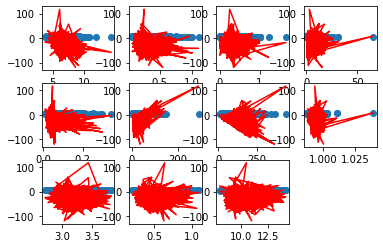

In [23]:
# Application du model sur le dataset en 2d
# Obtenir le nombre de caractéristiques
num_features = x.shape[1]

# Créer des scatter plots pour chaque caractéristique
for feature_index in range(num_features):
    plt.subplot(3, 4, feature_index + 1)  # Crée une grille de sous-graphiques
    plt.scatter(x[:, feature_index], y)

    # Prédiction du modèle de régression linéaire
    y_pred = model(X, theta)  # Calcul des prédictions
    plt.plot(x[:, feature_index], y_pred, c='r', label="Régression linéaire")

No handles with labels found to put in legend.


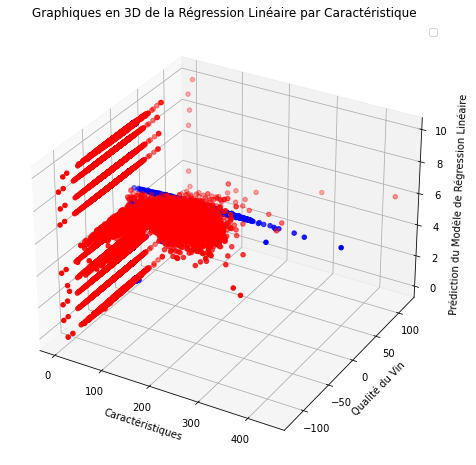

In [24]:
# Application du model sur le dataset en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Itérer sur chaque caractéristique
for feature_index in range(x.shape[1]):
    # Scatter plot des données réelles en bleu
    ax.scatter(x[:, feature_index], y, zs=feature_index, c='b', marker='o')

    # Prédiction du modèle de régression linéaire en rouge
    y_pred = model(X, theta)
    ax.scatter(x[:, feature_index], y_pred, zs=feature_index, c='r', marker='o')

ax.set_xlabel("Caractéristiques")
ax.set_ylabel("Qualité du Vin")
ax.set_zlabel("Prédiction du Modèle de Régression Linéaire")
plt.title("Graphiques en 3D de la Régression Linéaire par Caractéristique")


plt.legend()
plt.show()

#### Fonction de coût
Pour l'évaluation des performances

In [25]:
def cout(X, y, theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X, theta) - y) ** 2)

#### Algorithme de descente de gradient

In [26]:
# Calcul de dérivé (gradient)
def grad(X, y, theta):
    m = len(y)
    return (1 / m) * X.T.dot(model(X, theta) - y)

# Algorithme itératif de descente de gradient
def DG(X,y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta=theta-learning_rate*grad(X,y, theta)
        return theta

# Le test de DG avec notre modèle sur dataset
thetaF=DG(X,y, theta, learning_rate =0.0001, n_iterations=1000)
thetaF

array([[-2.27120819],
       [-0.35212488],
       [ 1.36786003],
       [ 1.26222707],
       [ 0.09528951],
       [ 1.20119204],
       [-0.00791863],
       [-1.25527852],
       [ 0.85603197],
       [ 0.72536827],
       [ 0.52499577],
       [-0.76385152]])

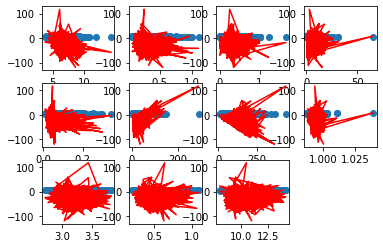

In [27]:
# Obtenir le nombre de caractéristiques
num_features = x.shape[1]

# Créer des scatter plots pour chaque caractéristique
for feature_index in range(num_features):
    plt.subplot(3, 4, feature_index + 1)  # Crée une grille de sous-graphiques
    plt.scatter(x[:, feature_index], y)

    # Prédiction du modèle de régression linéaire
    y_pred = model(X, theta)  # Calcul des prédictions
    plt.plot(x[:, feature_index], y_pred, c='r', label="Régression linéaire")

In [28]:
# Evaluation des performances
def DG(X, y, theta, learning_rate, n_iterations):
    histCout = np.zeros(n_iterations)
    for i in range(0 , n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        histCout[i] = cout(X, y, theta)
    return theta, histCout

thetaF, histCout=DG(X,y, theta, learning_rate =0.0001, n_iterations=1000)
thetaF, histCout

(array([[-2.24507898e+95],
        [-9.16008438e+93],
        [-1.10602747e+94],
        [-2.29347656e+95],
        [-1.53714772e+93],
        [-1.26691116e+96],
        [-4.93950846e+96],
        [-3.24726898e+94],
        [-1.04104846e+95],
        [-1.61439157e+94],
        [-3.37860663e+95],
        [-3.26519992e+94]]),
 array([8.70668910e+002, 1.27457019e+003, 1.90966159e+003, 2.90672549e+003,
        4.47057716e+003, 6.92197133e+003, 1.07632304e+004, 1.67810214e+004,
        2.62073110e+004, 4.09714299e+004, 6.40948187e+004, 1.00309223e+005,
        1.57024821e+005, 2.45846364e+005, 3.84947536e+005, 6.02789337e+005,
        9.43943271e+005, 1.47821078e+006, 2.31490479e+006, 3.62521541e+006,
        5.67723582e+006, 8.89081479e+006, 1.39234588e+007, 2.18048592e+007,
        3.41475700e+007, 5.34769400e+007, 8.37478051e+007, 1.31153657e+008,
        2.05393849e+008, 3.21658101e+008, 5.03734360e+008, 7.88875867e+008,
        1.23542326e+009, 1.93474121e+009, 3.02991185e+009, 4.74500

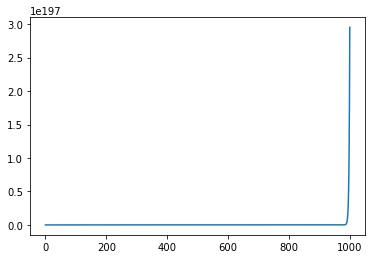

In [29]:
# Dessin de la courbe
plt.plot(range(1000),histCout)

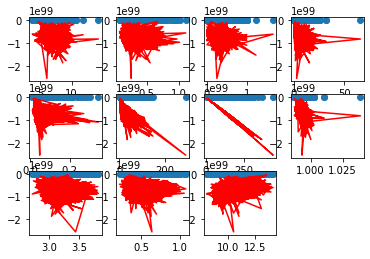

In [30]:
# Obtenir le nombre de caractéristiques
num_features = x.shape[1]

# Créer des scatter plots pour chaque caractéristique
for feature_index in range(num_features):
    plt.subplot(3, 4, feature_index + 1)  # Crée une grille de sous-graphiques
    plt.scatter(x[:, feature_index], y)

    # Prédiction du modèle de régression linéaire
    prediction=model(X, thetaF)  # Calcul des prédictions
    plt.plot(x[:, feature_index], prediction, c='r', label="Régression linéaire")

In [31]:
# Pour la courbe 3D

In [32]:
# Coefficient de détermination (un coeff à 1, le modèle est meilleure)
def coefDet(y, prediction):
    u = ((y - prediction) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v
coefDet(y, prediction)

-7.531879560278845e+197

La valeur s'approchant de 0.